<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/04_Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection

In this notebook we will be playing with the machine learning models to find the best fit for our problem and trying to get good metrics. We will also make neuronal networks and see how they fit.

## Notebook Dependencies


In [231]:
import pandas as pd
import sklearn
import numpy as np
import imblearn
import numpy as np
import seaborn as sns
import matplotlib
import pickle
import xgboost
import keras
from platform import python_version
print('python version', python_version())
print('pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('sns', sns.__version__)
print('keras', keras.__version__)
print('xgboost', xgboost.__version__)
print('pickle', pickle.format_version)
print('sns', sns.__version__)
print('imblearn', imblearn.__version__)
print('np', np.__version__)
print('sklearn', sklearn.__version__)



python version 3.7.10
pandas 1.1.5
matplotlib 3.2.2
sns 0.11.1
keras 2.5.0
xgboost 0.90
pickle 4.0
sns 0.11.1
imblearn 0.4.3
np 1.19.5
sklearn 0.22.2.post1


In [232]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/staff_encoded.csv .


In [233]:
import pandas as pd
staff = pd.read_csv('staff_encoded.csv', sep=';')

This is the data we have generated in previous notebooks and the one we are going to be using for the machine learning algorithms

In [234]:
staff.head(50)

,Unnamed: 0,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,Tipo_trab_reduced,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
0,0,0.0,0.0,0.0,0.0,1,Programador,Entre 30-50,Leve,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1
1,1,0.0,0.0,0.0,0.0,1,Gruista y limpieza de caldera,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,Otros,0,0,0,1
2,2,0.0,0.0,0.0,0.0,1,Gruista ácido,Entre 30-50,Muy grave,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1
3,3,0.0,0.0,0.0,0.0,1,Montacarguista (en entrenamiento),Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,Otros,0,0,0,1
4,4,0.0,0.0,0.0,0.0,1,Gruista y limpieza de caldera,Entre 30-50,Grave,Mantenimiento,1,0,0,1,1,0,0,Otros,0,0,0,1
5,5,17051.0,211.0,757.0,0.0,1,Líneas de Corte Longitudinal,Mayor 50,Muy grave,Mantenimiento,1,0,1,0,0,1,0,Otros,0,0,0,1
6,6,25249.0,42485.0,1419.0,829.0,1,Operadores limpieza de caldera y gruista de ca...,Entre 30-50,Grave,Mantenimiento,1,0,0,1,1,0,0,ETT,0,1,0,0
7,7,25249.0,42485.0,1419.0,829.0,1,Maestro,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,ETT,0,1,0,0
8,8,25249.0,42485.0,1419.0,829.0,1,Líneas de Corte Longitudinal,Mayor 50,Muy grave,Mantenimiento,1,0,0,1,0,1,0,ETT,0,1,0,0
9,9,0.0,0.0,0.0,0.0,1,Maschinenbediener/-einrichter Presse 5,Entre 30-50,Leve,Mantenimiento,1,0,1,0,1,0,0,Otros,0,0,0,1


In [235]:
len(staff.isnull().any())

22

In [236]:
staff = staff.fillna(0)

In [237]:
staff.describe()

,Unnamed: 0,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
count,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000
mean,10604.500000,9830.512164,12393.421075,681.684253,191.027251,0.197077,0.917727,0.377982,0.295568,0.326450,0.449976,0.343753,0.206271,0.101744,0.116832,0.241584,0.539840
std,6122.943941,11614.044567,17825.376910,612.159584,331.857391,0.397800,0.274786,0.484895,0.456308,0.468925,0.497503,0.474971,0.404637,0.302319,0.321227,0.428054,0.498422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5302.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10604.500000,0.000000,211.000000,607.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15906.750000,25249.000000,18303.000000,1419.000000,152.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,21209.000000,25685.000000,46113.000000,1544.000000,829.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [238]:
ceros = staff[staff['Accident'] == 0]['Accident'].count()
unos = staff[staff['Accident'] == 1]['Accident'].count()

print('No',ceros, 'Yes', unos) ## Here we can check that we have an unbalanced dataset as we have many more employees who didnt have an accident

No 17030 Yes 4180


In [239]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30',
        'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros']]


In [240]:
y = staff['Accident']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [242]:
len(X_test)

7000

In [243]:
y_train = y_train.apply(str)

y_test = y_test.apply(str)

In [244]:
X_test

,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
16651,25249.0,42485.0,1419.0,829.0,1,1,0,0,1,0,0,0,0,0,1
13898,25249.0,42485.0,1419.0,829.0,1,0,1,0,1,0,0,0,0,1,0
16269,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,1
7306,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,1
13631,25249.0,42485.0,1419.0,829.0,1,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,25249.0,42485.0,1419.0,829.0,1,0,1,0,0,1,0,0,0,0,1
8570,25249.0,42485.0,1419.0,829.0,1,0,0,1,0,1,0,0,1,0,0
14772,17051.0,211.0,757.0,0.0,0,0,1,0,0,1,0,0,0,0,1
14553,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,1,0,0


### Linear Regression model

In [245]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



Coefficients: 
 [-7.38626715e-06 -3.21901794e-06  1.77146111e-04  2.75685873e-04
  1.53118394e-01  8.77704300e-02 -1.01450137e-01  1.36797068e-02
 -4.14315358e-03  6.94219375e-03 -2.79904017e-03 -9.13789240e-02
  4.38322268e-02  5.77824625e-02 -1.02357654e-02]
Mean squared error: 0.14
Coefficient of determination: 0.12


# Logistic Regression

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import numpy as np
# we are going to import this function from Scikit learn to plot the confussion matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color= "black")
    fig.tight_layout()
    return ax

In [248]:
clf = LogisticRegression()

In [249]:
y_train = y_train.apply(str).replace('1', 'Yes').replace('0', 'No')

y_test = y_test.apply(str).replace('1', 'Yes').replace('0', 'No')

In [250]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix, without normalization
[[5615   20]
 [1359    6]]


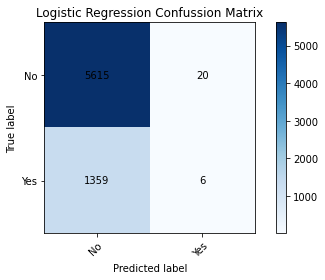

In [251]:
y_pred_log_reg=clf.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred_log_reg, classes=classes, title='Logistic Regression Confussion Matrix')

In [252]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [253]:
print (classification_report(y_test, y_pred_log_reg, target_names=classes))
print (accuracy_score(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5635
         Yes       0.23      0.00      0.01      1365

    accuracy                           0.80      7000
   macro avg       0.52      0.50      0.45      7000
weighted avg       0.69      0.80      0.72      7000

0.803


As we have unbalanced classes in our dataset we are going to balance them and perform again the algorithm. It is important for our model to predict good the 'Yes' class as it is crucial for the purpose.

We are going to oversample our minority class to get a 50% of each class

In [254]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

from collections import Counter

counter = Counter(y)

for k, v in counter.items():
  dist = v / len(y)* 100
  print(f'Class={k}, n={v}, ({dist}%)')



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=1, n=17030, (50.0%)
Class=0, n=17030, (50.0%)


In [255]:
## we are going to run the model again with this oversample data

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X, y, test_size=0.33, random_state=42)

In [256]:
clf = LogisticRegression()

clf.fit(X_train_os, y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix, without normalization
[[3527 2093]
 [1449 4171]]


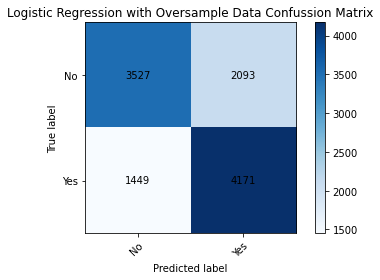

In [257]:
y_pred_log_reg_os =clf.predict(X_test_os)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test_os, y_pred_log_reg_os, classes=classes, title='Logistic Regression with Oversample Data Confussion Matrix')

In [258]:
## oversampling the data we have achieve a better result because now we have a precision in 'Yes' of 0.61 vs 0 previosly, but the overall accuracy is lower

print (classification_report(y_test_os, y_pred_log_reg_os, target_names=classes))
print (accuracy_score(y_test_os, y_pred_log_reg_os))

              precision    recall  f1-score   support

          No       0.71      0.63      0.67      5620
         Yes       0.67      0.74      0.70      5620

    accuracy                           0.68     11240
   macro avg       0.69      0.68      0.68     11240
weighted avg       0.69      0.68      0.68     11240

0.6848754448398576


In [259]:
logistic_r_acc = accuracy_score(y_test_os, y_pred_log_reg_os)
logistic_r_acc

0.6848754448398576

In [260]:
dict_prec  = classification_report(y_test_os, y_pred_log_reg_os, target_names=classes, output_dict=True)

logistic_r_prec_no = dict_prec['No']['precision']
logistic_r_prec_yes = dict_prec['Yes']['precision']

# K Nearest Neighbors

In [261]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier



In [262]:
model = KNeighborsClassifier(n_neighbors=8)
model = model.fit(X_train, y_train)

In [263]:
std_score = model.score(X_test, y_test)
std_score ##this is a very good accuracy of the model

0.8158571428571428

In [264]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization
[[5429  206]
 [1083  282]]


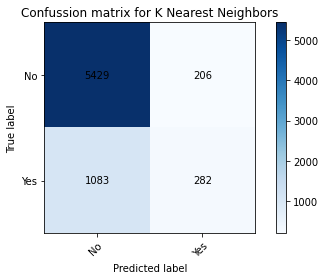

In [265]:
classes = ['No', 'Yes']

plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for K Nearest Neighbors')

In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.96      0.89      5635
         Yes       0.58      0.21      0.30      1365

    accuracy                           0.82      7000
   macro avg       0.71      0.59      0.60      7000
weighted avg       0.78      0.82      0.78      7000



In [267]:
print (accuracy_score(y_test, y_pred))

0.8158571428571428


we are going to run the model again but with the balanced data and see if the metrics increase

In [268]:
model = KNeighborsClassifier(n_neighbors=8)
model = model.fit(X_train_os, y_train_os)

In [269]:
y_pred_os = model.predict(X_test_os)

Confusion matrix, without normalization
[[4376 1244]
 [1928 3692]]


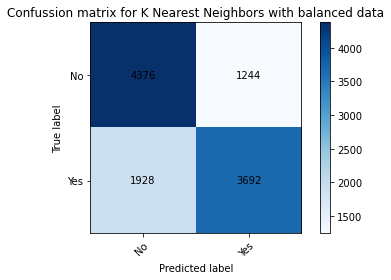

In [270]:
classes = ['No', 'Yes']

plot_confusion_matrix(y_test_os, y_pred_os, classes=classes, title='Confussion matrix for K Nearest Neighbors with balanced data')

In [271]:
print(classification_report(y_test_os, y_pred_os))
print (accuracy_score(y_test_os, y_pred_os)) ## metrics for 'yes' class increase but overall accuracy decrease a little bit

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      5620
           1       0.75      0.66      0.70      5620

    accuracy                           0.72     11240
   macro avg       0.72      0.72      0.72     11240
weighted avg       0.72      0.72      0.72     11240

0.7177935943060498


In [272]:
k_neig_acc = accuracy_score(y_test_os, y_pred_os)
k_neig_acc

0.7177935943060498

In [273]:
dict_prec  = classification_report(y_test_os, y_pred_os, target_names=classes, output_dict=True)

k_neig_prec_no = dict_prec['No']['precision']
k_neig_prec_yes = dict_prec['Yes']['precision']

## Decision Tree

In [274]:
## check la distribucion de datos de una columna del dataset

import seaborn as sns


In [275]:
y_train = y_train.apply(str).replace('1', 'Yes').replace('0', 'No')

y_test = y_test.apply(str).replace('1', 'Yes').replace('0', 'No')


In [276]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)

In [277]:
model.fit(X_train, y_train) ## we are going to start without giving any weight to the classes class_weight but then we will try to assign the correspondent weight

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [278]:
y_pred = model.predict(X_test)

In [279]:
comp = pd.DataFrame({'real': y_test, 'preds':y_pred})
comp.head(10) ## parece que esta acertando debido al desbalanceo vamos analizar los casos que deberian de ser 1

,real,preds
16651,No,No
13898,No,No
16269,No,No
7306,No,No
13631,No,No
4609,No,No
18063,No,No
408,Yes,No
12181,No,No
3062,Yes,No


In [280]:
comp[comp['real']=='Yes'] ##casi siempre esta prediciendo 0 para los casos de 1

,real,preds
408,Yes,No
3062,Yes,No
936,Yes,Yes
44,Yes,Yes
447,Yes,Yes
...,...,...
1246,Yes,Yes
800,Yes,Yes
2074,Yes,No
1483,Yes,No


In [281]:
## lets check the percentge of accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc ## this accuracy is good but our problem is that it is very import to us to identify those cases with an accident so we need to better up our prediction on those

0.8225714285714286

In [282]:
len(y_test[y_test=='Yes'])

1365

Confusion matrix, without normalization
[[5346  289]
 [ 953  412]]


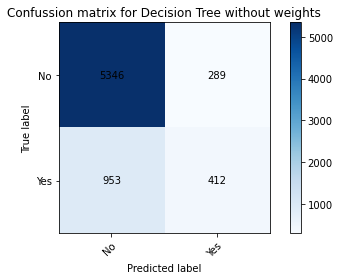

In [283]:
classes = ['No', 'Yes']

plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree without weights')

Here we are going to perform a GridSearchCV to find th best hiperparameters for our dataset.

In [284]:
from sklearn.model_selection import GridSearchCV

clf_dt = GridSearchCV(DecisionTreeClassifier(),
                      param_grid={"min_samples_leaf":[1,20],
                                 'max_depth': np.arange(2, 20)},
                     cv = 4,
                     scoring = "accuracy")

In [285]:
clf_dt.fit(X_train, y_train)


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 1

In [286]:
clf_dt.best_score_


0.826319410636361

In [287]:
clf_dt.best_params_

{'max_depth': 8, 'min_samples_leaf': 20}

Now we are going to  run the model again but with the class weights according to the frequency of the classes to try to balance them and achieve better results

In [288]:
## lets check frequencies
staff['Accident'] = staff['Accident'].apply(str).apply(lambda x: x.replace('1', 'Yes').replace('0', 'No'))
counts = staff['Accident'].replace('1', 'Yes').replace('0','No').astype(str).value_counts().to_dict()
print(counts)



{'No': 17030, 'Yes': 4180}


In [289]:

model = DecisionTreeClassifier(random_state=1, class_weight =counts, max_depth= 9, min_samples_leaf = 20)
model.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight={'No': 17030, 'Yes': 4180},
                       criterion='gini', max_depth=9, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [290]:
y_pred = model.predict(X_test)
comp_2 = pd.DataFrame({'real': y_test, 'preds':y_pred})
comp_2[comp_2['real']=='Yes'] ## it seems it has increase accuracy, lets check

,real,preds
408,Yes,No
3062,Yes,No
936,Yes,No
44,Yes,No
447,Yes,No
...,...,...
1246,Yes,No
800,Yes,No
2074,Yes,No
1483,Yes,No


In [291]:
acc = accuracy_score(y_test, y_pred)
acc 

0.8064285714285714

In [292]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5629,    6],
       [1349,   16]])

If we add the best parameter the accuracy is increasing bt because it is never predicting value 'yes' so it is not working correctly

Confusion matrix, without normalization
[[5629    6]
 [1349   16]]


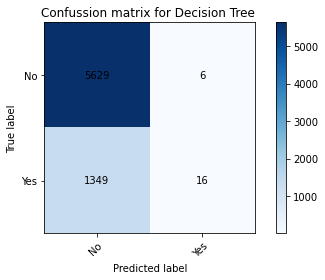

In [293]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [294]:
##lets try without them

model = DecisionTreeClassifier()
model = DecisionTreeClassifier(random_state=1, class_weight =counts)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={'No': 17030, 'Yes': 4180},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [295]:
y_pred = model.predict(X_test)


Confusion matrix, without normalization
[[5625   10]
 [1344   21]]


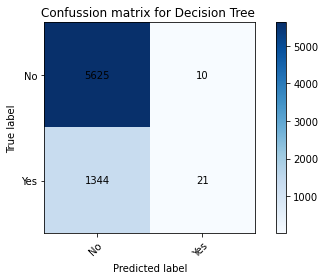

In [296]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [297]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

scores = cross_validate(model, X_test, y_test, scoring ='f1_macro')

In [298]:
scores ## if we look at the test_score it is around .4 which is bad

{'fit_time': array([0.02698851, 0.01917982, 0.02140808, 0.02184963, 0.02072382]),
 'score_time': array([0.01430368, 0.01174688, 0.01423097, 0.01203632, 0.0116744 ]),
 'test_score': array([0.48586948, 0.47849744, 0.45557488, 0.4491115 , 0.46202672])}

Now we are going to try to over sample our minority class to balance our classes and achieve better results

In [299]:
from imblearn.over_sampling import SMOTE

In [300]:
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [301]:
from collections import Counter

counter = Counter(y)

for k, v in counter.items():
  dist = v / len(y)* 100
  print(f'Class={k}, n={v}, ({dist}%)')

Class=1, n=17030, (50.0%)
Class=0, n=17030, (50.0%)


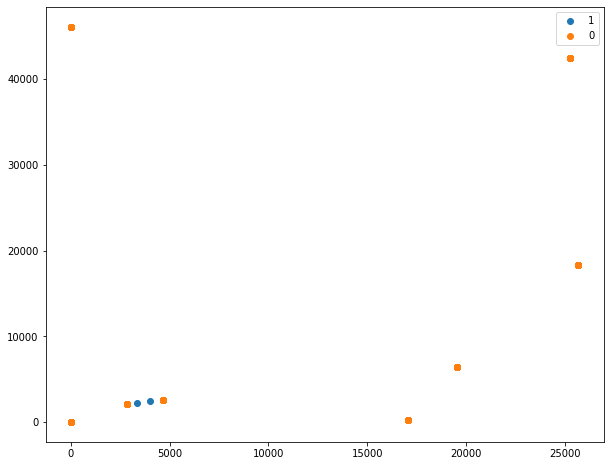

In [302]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10,8))

for label, _ in counter.items():
  row = np.where(y==label)[0]
  plt.scatter(X[row, 0], X[row, 1], label=str(label))


plt.legend()

In [303]:
## we are going to run the model again with this oversample data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [304]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion matrix, without normalization
[[4289 1331]
 [1464 4156]]


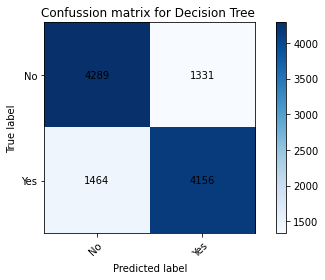

In [305]:
y_pred = model.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [306]:
scores = cross_validate(model, X_test, y_test, scoring ='f1_macro')
scores ## our model has increased positively its test score with going around now a .8 which is a good result

{'fit_time': array([0.01982903, 0.01501107, 0.01515627, 0.01471996, 0.01579094]),
 'score_time': array([0.00289965, 0.00266123, 0.00271344, 0.00265121, 0.00381351]),
 'test_score': array([0.75133408, 0.73439776, 0.74773941, 0.74910059, 0.75476702])}

In [307]:
print (classification_report(y_test, y_pred, target_names=classes))
print (accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.75      0.76      0.75      5620
         Yes       0.76      0.74      0.75      5620

    accuracy                           0.75     11240
   macro avg       0.75      0.75      0.75     11240
weighted avg       0.75      0.75      0.75     11240

0.7513345195729537


In [308]:
decision_tree_acc = accuracy_score(y_test, y_pred)
decision_tree_acc

0.7513345195729537

In [309]:
dict_prec  = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

decision_tree_no = dict_prec['No']['precision']
decision_tree_yes = dict_prec['Yes']['precision']

# Random Forest Algorithm

We are going to perform this algorithm with the balanced data we have generated before, so we are going to be using same partitions

In [310]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [311]:
model.score(X_test, y_test) 

0.7519572953736655

In [312]:
y_predicted = model.predict(X_test)

Confusion matrix, without normalization
[[4285 1335]
 [1453 4167]]


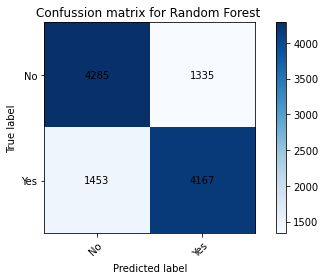

In [313]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_predicted, classes=classes, title='Confussion matrix for Random Forest ')

In [314]:
print (classification_report(y_test, y_pred, target_names=classes))
print (accuracy_score(y_test, y_predicted))

              precision    recall  f1-score   support

          No       0.75      0.76      0.75      5620
         Yes       0.76      0.74      0.75      5620

    accuracy                           0.75     11240
   macro avg       0.75      0.75      0.75     11240
weighted avg       0.75      0.75      0.75     11240

0.7519572953736655


### hyperparameter optimization

Now we are going to apply a GridSearch CV to try maximize performance in our algorithm and be able to apply the hiperparamethers that best fits our model

In [315]:
from sklearn.model_selection import GridSearchCV

param_grid={"min_samples_leaf": [1,20], #min number of samples required at each leaf code
            'n_estimators': [int(x) for x in np.linspace(start=10, stop=80, num=10)], # number of trees in random forest
            'max_depth': np.arange(2,10), #number of levels in the tree
            'min_samples_split': [2,5]} # min number of samples required to split a node 

In [316]:
from sklearn.model_selection import GridSearchCV

clf_rt = GridSearchCV(RandomForestClassifier(),
                      param_grid=param_grid,cv = 3,scoring = "accuracy",n_jobs = 4, verbose = 2)

In [317]:
clf_rt.fit(X, y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   44.7s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [318]:
clf_rt.best_score_

0.7445100150350439

In [319]:
clf_rt.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 25}

In [320]:
clf_rf_good = clf_rt.best_estimator_


By the feature importances method we can observe how each variable impacts the decisions taken by the random forest

In [321]:
clf_rf_good.feature_importances_


array([0.05794701, 0.07549928, 0.31339227, 0.03810544, 0.10197312,
       0.07589202, 0.1443286 , 0.02693242, 0.00627101, 0.00594675,
       0.00690867, 0.05675594, 0.02300763, 0.02958327, 0.03745657])

Now we are going to run the algorithm with the best parameter we got from the GridSearchCV

In [322]:
model = RandomForestClassifier(max_depth= 9 , min_samples_leaf= 1, min_samples_split= 5, n_estimators= 72)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=72,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [323]:
model.score(X_test, y_test) 

0.7456405693950178

In [324]:
y_predicted = model.predict(X_test)

Confusion matrix, without normalization
[[4015 1605]
 [1254 4366]]


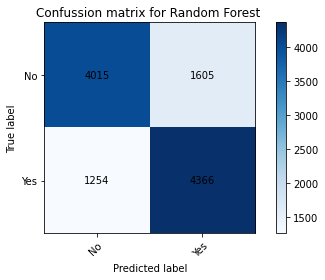

In [325]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_predicted, classes=classes, title='Confussion matrix for Random Forest ')

In [326]:
print (classification_report(y_test, y_pred, target_names=classes))
print (accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.75      0.76      0.75      5620
         Yes       0.76      0.74      0.75      5620

    accuracy                           0.75     11240
   macro avg       0.75      0.75      0.75     11240
weighted avg       0.75      0.75      0.75     11240

0.7513345195729537


With the hiperparameter optimization we have improve the metrics in our model. Now we are going to discard the columns with less importance according with the feature importances we got above. 

The columns we are going to discard are the following ones:

- 'Age_Menor 30'
- 'Acc_Duración Determinada'
- 'Acc_ETT'


In [327]:

X_reduced = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 
       'Acc_Indefinido', 'Acc_Otros']]
y_reduced = staff['Accident']

In [328]:
oversample = SMOTE()

X_reduced, y_reduced = oversample.fit_resample(X_reduced, y_reduced)

from collections import Counter

counter = Counter(y)

for k, v in counter.items():
  dist = v / len(y_reduced)* 100
  print(f'Class={k}, n={v}, ({dist}%)')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=1, n=17030, (50.0%)
Class=0, n=17030, (50.0%)


In [329]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.33, random_state=42)

Now that we have our test and train datasets reduced by the most important columns, we are going to run again the algorithm to see if the metrics has improved.



In [330]:
model = RandomForestClassifier(max_depth= 9 , min_samples_leaf= 1, min_samples_split= 5, n_estimators= 48)

model.fit(X_train_reduced, y_train_reduced)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=48,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [331]:
model.score(X_test_reduced, y_test_reduced) ## as we can see the metric remain almost the same

0.7328291814946619

We are going to run again the GridSearchCv to find the best hiperparameters again and check the feature importances , but this time with the new X_reduced and y_reduced

In [332]:
from sklearn.model_selection import GridSearchCV

param_grid={"min_samples_leaf": [1,20], #min number of samples required at each leaf code
            'n_estimators': [int(x) for x in np.linspace(start=10, stop=80, num=10)], # number of trees in random forest
            'max_depth': np.arange(2,10), #number of levels in the tree
            'min_samples_split': [2,5]} # min number of samples required to split a node 

In [333]:
clf_rt = GridSearchCV(RandomForestClassifier(),
                      param_grid=param_grid,cv = 3,scoring = "accuracy",n_jobs = 4, verbose = 2)

In [334]:
clf_rt.fit(X_train_reduced, y_train_reduced)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [335]:
clf_rt.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 56}

In [336]:
#we run the model with the new parameters we just obtained

model = RandomForestClassifier(max_depth= 9 , min_samples_leaf= 1, min_samples_split= 2, n_estimators= 17)

model.fit(X_train_reduced, y_train_reduced)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [337]:
clf_rf_good = clf_rt.best_estimator_
clf_rf_good.feature_importances_


array([0.08394909, 0.06807403, 0.3390239 , 0.04537519, 0.10907483,
       0.08507044, 0.11845191, 0.03105988, 0.01437941, 0.01578628,
       0.0337808 , 0.05597425])

In [338]:
model.score(X_test_reduced, y_test_reduced) #same score we didnt got any better

0.7322064056939501

In [339]:
y_predicted_red = model.predict(X_test_reduced)

Confusion matrix, without normalization
[[4019 1601]
 [1409 4211]]


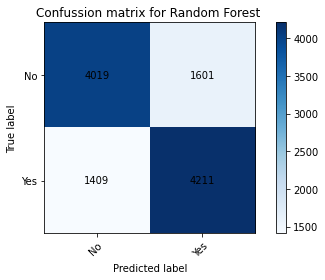

In [340]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test_reduced, y_predicted_red, classes=classes, title='Confussion matrix for Random Forest ')

In [341]:
print (classification_report(y_test_reduced, y_predicted_red, target_names=classes))
print (accuracy_score(y_test_reduced, y_predicted_red))

              precision    recall  f1-score   support

          No       0.74      0.72      0.73      5620
         Yes       0.72      0.75      0.74      5620

    accuracy                           0.73     11240
   macro avg       0.73      0.73      0.73     11240
weighted avg       0.73      0.73      0.73     11240

0.7322064056939501


In [342]:
random_forest_acc = accuracy_score(y_test_reduced, y_predicted_red)

In [343]:
dict_prec  = classification_report(y_test_reduced, y_predicted_red, target_names=classes, output_dict=True)

random_forest_no = dict_prec['No']['precision']
random_forest_yes = dict_prec['Yes']['precision']

### Ploting the learning curve from the Random Forest

The learning curve visualize the effect of the number of observatiosn on the performance metric

In [344]:
from sklearn.model_selection import learning_curve

In [345]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv = 3, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy', verbose=1)

[learning_curve] Training set sizes: [ 2270  7379 12488 17597 22706]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   15.3s finished


In [346]:
import numpy as np

train_mean = np.mean(train_scores, axis = 1)
train_mean

array([1.        , 0.83335592, 0.81766496, 0.77088898, 0.75725946])

In [347]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.        , 0.11783517, 0.06964813, 0.00605287, 0.00396735])

In [348]:
test_mean = np.mean (test_scores, axis = 1)
test_mean

array([0.5       , 0.65408556, 0.64812422, 0.72615985, 0.74815056])

In [349]:
test_std = np.std(test_scores, axis = 1)

test_std

array([3.59595077e-05, 1.08969189e-01, 7.85265193e-02, 4.29969009e-03,
       6.12705888e-03])

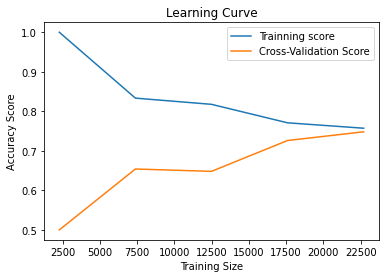

In [350]:
plt.plot(train_sizes, train_mean, label = 'Trainning score') #train accuracy
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score') #training accuracy

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

We are going to save the model

In [351]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [352]:
import pickle

In [353]:
pick_insert = open('gdrive/My Drive/Colab Notebooks/TFM Accidentabilidad/random_forest_model', 'wb')
pickle.dump(model, pick_insert)
pick_insert.close()

# XGBoost

Now we are going to check the XGBoost algorithm efficacy

In [354]:
from xgboost import XGBClassifier


In [355]:
param_grid={'max_depth': np.arange(2,10),
             "learning_rate": [0.05],
              "n_estimators": np.arange(100, 150, 10)}

In [356]:

clf_xg = GridSearchCV(XGBClassifier(),
                      param_grid = param_grid ,
                      cv = 4,
                      scoring = 'accuracy', verbose = 2,
                      n_jobs = -1
         )

In [357]:
clf_xg.fit(X_train, y_train)


Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.8min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 110, 

In [358]:
clf_xg.best_params_


{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 140}

In [359]:
clf_xg.best_score_


0.7467572304995618

Confusion matrix, without normalization
[[4289 1331]
 [1464 4156]]


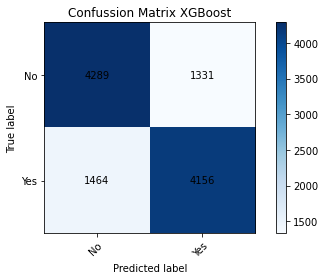

In [360]:

clf_xgb_test = XGBClassifier(learning_rate = 0.05, max_depth = 8, n_estimators = 140)
clf_xgb_test.fit(X_train, y_train)
y_pred_xgb=clf_xgb_test.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion Matrix XGBoost')

In [361]:
print (classification_report(y_test, y_pred, target_names=classes))
print (accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.75      0.76      0.75      5620
         Yes       0.76      0.74      0.75      5620

    accuracy                           0.75     11240
   macro avg       0.75      0.75      0.75     11240
weighted avg       0.75      0.75      0.75     11240

0.7513345195729537


In [362]:
xg_boost_acc = accuracy_score(y_test, y_pred)
xg_boost_acc

0.7513345195729537

In [363]:
dict_prec  = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

xg_boost_no = dict_prec['No']['precision']
xg_boost_yes = dict_prec['Yes']['precision']

# SVM : Support Vector Machine 

This machine learning methods are one of the best options when getting the correct answer is higher priority than understanding why you get that answer. 

As Support Vector Machines work well with small datasets and not awesome with large ones and it will take long time to optimize with Cross Validation. 

So, we will downsample both categories.

In [364]:
staff_reduced_sv = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 
       'Acc_Indefinido', 'Acc_Otros', 'Accident']]
len(staff_reduced_sv)

21210

In [365]:
staff_reduced_sv['Accident'] = staff_reduced_sv['Accident'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [366]:
staff_reduced_sv['Accident'] = staff_reduced_sv['Accident'].apply(lambda x: x.replace('Yes', '1').replace('No', '0'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [367]:
staff_reduced_sv['Accident'] = staff_reduced_sv['Accident'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [368]:
yes_sv = staff_reduced_sv[staff_reduced_sv['Accident']==1]
no_sv = staff_reduced_sv[staff_reduced_sv['Accident']==0]

In [369]:
len(yes_sv)

4180

In [370]:
from sklearn.utils import resample

In [371]:
yes_sv_downsample = resample(yes_sv, 
                             replace=False,
                             n_samples = 2000, random_state=42)

len(yes_sv_downsample)

2000

In [372]:
no_sv_downsample = resample(no_sv, 
                             replace=False,
                             n_samples = 2000,
                             random_state=42)

len(no_sv_downsample)

2000

In [373]:
sv_downsample = pd.concat([no_sv_downsample, yes_sv_downsample])
len(sv_downsample)

4000

In [374]:
X_sv = sv_downsample.drop('Accident', axis = 1).copy()
X_sv.head()

,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Acc_Indefinido,Acc_Otros
16293,25685.0,18303.0,1151.0,152.0,1,0,0,1,0,1,0,1
17332,0.0,0.0,0.0,0.0,1,1,0,0,0,1,1,0
6016,0.0,0.0,607.0,0.0,1,0,1,0,1,0,0,0
4239,25685.0,18303.0,1151.0,152.0,1,0,1,0,1,0,0,1
7913,25249.0,42485.0,1419.0,829.0,1,0,0,1,1,0,0,1


In [375]:
y_sv = sv_downsample['Accident'].copy()
y_sv.head()

16293    0
17332    0
6016     0
4239     0
7913     0
Name: Accident, dtype: int64

In [376]:
# we are going to split and scale the data

from sklearn.preprocessing import scale

In [377]:
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X_sv, y_sv, random_state = 42)

X_train_sv_scaled = scale(X_train_sv)
X_test_sv_scaled = scale(X_test_sv)

In [378]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_sv_scaled, y_train_sv)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

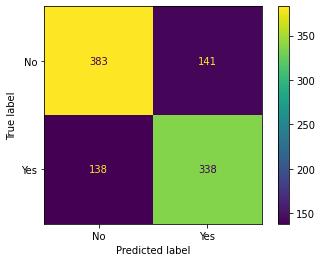

In [379]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_svm, X_test_sv_scaled, y_test_sv, values_format='d', display_labels=['No', 'Yes'])

In [380]:
y_pred_svm=clf_svm.predict(X_test_sv_scaled)


In [381]:
classes = ['No', 'Yes']
print (classification_report(y_test_sv, y_pred_svm, target_names=classes))
print (accuracy_score(y_test_sv, y_pred_svm))

              precision    recall  f1-score   support

          No       0.74      0.73      0.73       524
         Yes       0.71      0.71      0.71       476

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000

0.721


We are going to try improve the parameters using cross validation and GridSearchCv

In [382]:
param_grid = [{
    'C':[0.5, 1, 10, 100],
    'gamma':['scale', 1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
},]

In [383]:
optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv = 5, 
    scoring = 'accuracy'
)

In [384]:
optimal_params.fit(X_train_sv_scaled, y_train_sv)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [385]:
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [386]:
#now that we got our idel parameters we are going to run again the model with them and check it has improved

In [387]:
clf_svm = SVC(random_state=42, C =10, gamma='scale', kernel='rbf')
clf_svm.fit(X_train_sv_scaled, y_train_sv)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

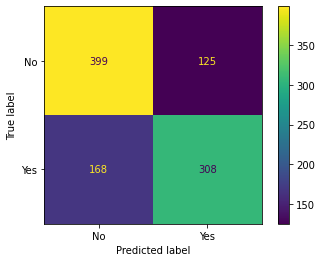

In [388]:
plot_confusion_matrix(clf_svm, X_test_sv_scaled, y_test_sv, values_format='d', display_labels=['No', 'Yes'])

In [389]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color= "black")
    fig.tight_layout()
    return ax

In [390]:
y_pred_svm=clf_svm.predict(X_test_sv_scaled)


Confusion matrix, without normalization
[[399 125]
 [168 308]]


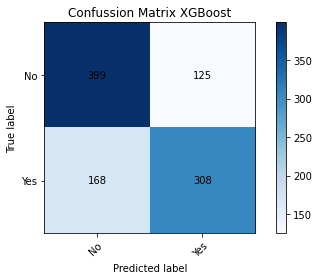

In [391]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test_sv, y_pred_svm, classes=classes, title='Confussion Matrix XGBoost')

In [392]:

print (classification_report(y_test_sv, y_pred_svm, target_names=classes))
print (accuracy_score(y_test_sv, y_pred_svm))

              precision    recall  f1-score   support

          No       0.70      0.76      0.73       524
         Yes       0.71      0.65      0.68       476

    accuracy                           0.71      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.71      0.71      0.71      1000

0.707


In [393]:
svm_acc = accuracy_score(y_test_sv, y_pred_svm)

In [394]:
dict_prec  = classification_report(y_test_sv, y_pred_svm, target_names=classes, output_dict=True)

svm_no = dict_prec['No']['precision']
svm_yes = dict_prec['Yes']['precision']

#Ensembles: voting, bagging, boosting, stacking

An Ensemble is a combination of machine learning models, each model makes a different prediction, the different predictions get combined to obtain a unique prediction. We are going to try voting and bagging techniques to see if we are able to increase our predictions

- Voting: each model makes a prediction, the final prediction will be the one voted by more models.
- Bagging : fit several models and average their predicitions in order to obtain a model with lower variance


## Voting : Logistic regression, random forest and Naive Bayes

In [395]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

In [396]:
X = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 
       'Acc_Indefinido', 'Acc_Otros']]

y = staff['Accident']

In [397]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

from collections import Counter

counter = Counter(y)

for k, v in counter.items():
  dist = v / len(y)* 100
  print(f'Class={k}, n={v}, ({dist}%)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=Yes, n=17030, (50.0%)
Class=No, n=17030, (50.0%)


In [398]:
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes',]
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()


In [399]:
## we create now the voting classifier, trying the hard voting
# Hard voting classifiers consider the class output and then takes the majority

voting_clf_hard = VotingClassifier(estimators=[(labels[0], clf1),
                                               (labels[1], clf2),
                                               (labels[2], clf3)],
                                   voting = 'hard')


In [400]:
## we create now the voting classifier, trying the soft voting.
#Soft voting classifiers takes a probability score and then averages out the probabilities

voting_clf_soft = VotingClassifier(estimators=[(labels[0], clf1),
                                               (labels[1], clf2),
                                               (labels[2], clf3)],
                                   voting = 'soft')

As we can see we couldnt increase the result from the random forest using these 3 models, but with the soft voting we increase the average of all

In [401]:
labels_two = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

for clf, label in zip([clf1, clf2, clf3, voting_clf_hard, voting_clf_soft], labels_two):

  scores = model_selection.cross_val_score(clf, X, y, 
                                           cv = 5, 
                                           scoring='accuracy')
  print('Accuracy : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy : 0.67 (+/- 0.01) [Logistic Regression]
Accuracy : 0.74 (+/- 0.00) [Random Forest]
Accuracy : 0.59 (+/- 0.01) [Naive Bayes]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy : 0.69 (+/- 0.02) [Voting_Classifier_Hard]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy : 0.71 (+/- 0.00) [Voting_Classifier_Soft]


## Voting : Random Forest, XGBoost and Decision Tree

We are going to try again but with the models we achieved best results and the hiperparameters we used: Random Forest, XGBoost and Decision Tree

In [402]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


clf1 = XGBClassifier(learning_rate = 0.05, max_depth = 8, n_estimators = 140)
clf2 = RandomForestClassifier(max_depth= 9 , min_samples_leaf= 1, min_samples_split= 2, n_estimators= 17)
clf3 = DecisionTreeClassifier()

labels = ['XGBoost', 'Random Forest', 'Decision Tree']

In [403]:
voting_clf_hard = VotingClassifier(estimators=[(labels[0], clf1),
                                               (labels[1], clf2),
                                               (labels[2], clf3)],
                                   voting = 'hard')

In [404]:
voting_clf_soft = VotingClassifier(estimators=[(labels[0], clf1),
                                               (labels[1], clf2),
                                               (labels[2], clf3)],
                                   voting = 'soft')

As we can see below we are not able to increase the accuracy by combining these models

In [405]:
labels_two = ['XGBoost', 'Random Forest', 'Decision Tree', 'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

for clf, label in zip([clf1, clf2, clf3, voting_clf_hard, voting_clf_soft], labels_two):

  scores = model_selection.cross_val_score(clf, X, y, 
                                           cv = 5, 
                                           scoring='accuracy')
  print('Accuracy : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))

Accuracy : 0.74 (+/- 0.00) [XGBoost]
Accuracy : 0.73 (+/- 0.00) [Random Forest]
Accuracy : 0.74 (+/- 0.00) [Decision Tree]
Accuracy : 0.74 (+/- 0.00) [Voting_Classifier_Hard]
Accuracy : 0.74 (+/- 0.00) [Voting_Classifier_Soft]


Lets see in detail the results obtained by the Voting Classifiers

Confusion matrix, without normalization
[[4028 1592]
 [1379 4241]]


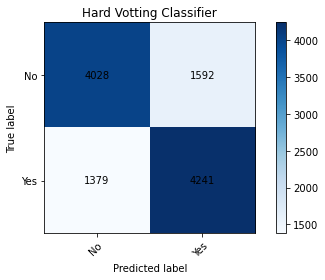

In [406]:
voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred_hard, classes=classes, title='Hard Votting Classifier')

In [407]:
print (classification_report(y_test, y_pred_hard, target_names=classes))
print (accuracy_score(y_test, y_pred_hard))

              precision    recall  f1-score   support

          No       0.74      0.72      0.73      5620
         Yes       0.73      0.75      0.74      5620

    accuracy                           0.74     11240
   macro avg       0.74      0.74      0.74     11240
weighted avg       0.74      0.74      0.74     11240

0.73567615658363


In [408]:
hard_votting_acc = accuracy_score(y_test, y_pred_hard)

In [409]:
dict_prec  = classification_report(y_test, y_pred_hard, target_names=classes, output_dict=True)

hard_vott_no = dict_prec['No']['precision']
hard_vott_yes = dict_prec['Yes']['precision']

Confusion matrix, without normalization
[[4033 1587]
 [1371 4249]]


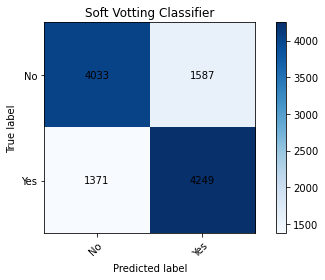

In [410]:
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred_soft, classes=classes, title='Soft Votting Classifier')

In [411]:
print (classification_report(y_test, y_pred_soft, target_names=classes))
print (accuracy_score(y_test, y_pred_soft))

              precision    recall  f1-score   support

          No       0.75      0.72      0.73      5620
         Yes       0.73      0.76      0.74      5620

    accuracy                           0.74     11240
   macro avg       0.74      0.74      0.74     11240
weighted avg       0.74      0.74      0.74     11240

0.7368327402135232


In [412]:
dict_prec  = classification_report(y_test, y_pred_soft, target_names=classes, output_dict=True)
soft_vott_no = dict_prec['No']['precision']
soft_vott_yes = dict_prec['Yes']['precision']

In [413]:
soft_votting_acc = accuracy_score(y_test, y_pred_soft)

#Bagging or Bootstrap Aggregation: Random Forest



In [414]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [415]:
## we are going to start running the model with the basic parameters. As we can see the result is good comparing with the other models we run, although it is not better

model = BaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
score = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=-1)

print(f"Mean accuracy: {np.mean(score):.3f} \nstd: {np.std(score):.3f}")

Mean accuracy: 0.736 
std: 0.005


In [416]:
## lets try to increase the results with other hiperparameters


model = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=1, max_depth=9), n_estimators=400)

score = cross_val_score(model, X, y, scoring='accuracy', cv = 10, n_jobs=-1)

print(f"Mean accuracy: {np.mean(score):.3f} \nstd: {np.std(score):.3f}")

Mean accuracy: 0.735 
std: 0.006


In [417]:
bagging_class_acc = np.mean(score)

# Neural Network

We are going to try to run a neural network and check if our model gets better

In [418]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import utils


In [419]:
X = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30',
        'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros']]


y = staff['Accident']




In [420]:
y= y.replace('Yes',1).replace('No', 0)

In [421]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

from collections import Counter

counter = Counter(y)

for k, v in counter.items():
  dist = v / len(y)* 100
  print(f'Class={k}, n={v}, ({dist}%)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=1, n=17030, (50.0%)
Class=0, n=17030, (50.0%)


In [422]:
X_train.shape

(22820, 15)

In [423]:
model = keras.Sequential([
                          keras.layers.Dense(32, input_shape=(15,), activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(2, activation='softmax')
])

In [424]:
model.compile(optimizer=optimizers.RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=[metrics.categorical_accuracy])

In [425]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 34        
Total params: 1,074
Trainable params: 1,074
Non-trainable params: 0
_________________________________________________________________


In [426]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [427]:
h = model.fit(X_train,y_train, epochs=30,  batch_size=10, validation_split=.2)

Epoch 1/30
1826/1826 [==============================] - 4s 2ms/step - loss: 140.3865 - categorical_accuracy: 0.5757 - val_loss: 40.1340 - val_categorical_accuracy: 0.2088
Epoch 2/30
1826/1826 [==============================] - 3s 2ms/step - loss: 44.7182 - categorical_accuracy: 0.5786 - val_loss: 44.4829 - val_categorical_accuracy: 0.3666
Epoch 3/30
1826/1826 [==============================] - 3s 2ms/step - loss: 28.8874 - categorical_accuracy: 0.5804 - val_loss: 15.7929 - val_categorical_accuracy: 0.2296
Epoch 4/30
1826/1826 [==============================] - 3s 2ms/step - loss: 17.8070 - categorical_accuracy: 0.5386 - val_loss: 4.4913 - val_categorical_accuracy: 0.3192
Epoch 5/30
1826/1826 [==============================] - 3s 2ms/step - loss: 2.3676 - categorical_accuracy: 0.4188 - val_loss: 0.6409 - val_categorical_accuracy: 0.3501
Epoch 6/30
1826/1826 [==============================] - 3s 2ms/step - loss: 0.6648 - categorical_accuracy: 0.3310 - val_loss: 0.6588 - val_categorical_a

In [428]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc) 

352/352 - 0s - loss: 0.6189 - categorical_accuracy: 0.2177

Test accuracy: 0.2177046239376068


In [429]:
# we are going to use this function we learn during the master to plot the learning

def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()

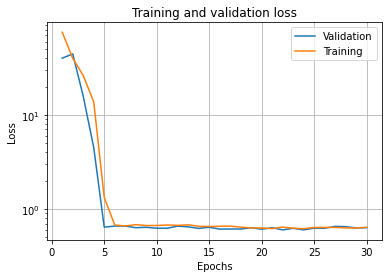

In [430]:
plot_metric(h, 'loss')

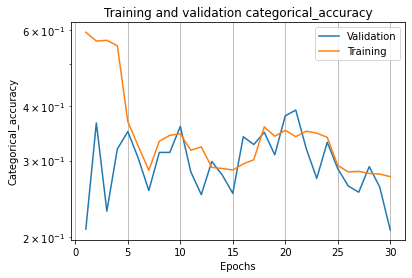

In [431]:
plot_metric(h, 'categorical_accuracy')

We are going to normalize the data in order to achieve better results

In [432]:
X_reduced = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 
       'Acc_Indefinido', 'Acc_Otros']]
y_reduced = staff['Accident'].copy()

In [433]:
y_reduced = y_reduced.replace('Yes', 1).replace('No', 0)

In [434]:
def normalize(df):

  for column in df.columns:
    X_reduced[column] = X_reduced[column]  / X_reduced[column].max()

In [435]:
len(X_reduced.columns)

12

In [436]:
normalize(X_reduced)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [437]:
y_reduced_r = y_reduced.replace('Yes','1').replace('No', '0')

In [438]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_reduced, y_reduced_r, test_size=0.33, random_state=42)

In [439]:
model = keras.Sequential([
                          keras.layers.Dense(32, input_shape=(12,), activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(2, activation='softmax') #the number of nodes in the output layer matches the number of labels
])

In [440]:
model.compile(optimizer=optimizers.RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=[metrics.categorical_accuracy])

In [441]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                416       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 34        
Total params: 978
Trainable params: 978
Non-trainable params: 0
_________________________________________________________________


In [442]:
from keras.callbacks import History 
history = History()


In [443]:
h = model.fit(X_train_norm, y_train_norm, epochs=30,  batch_size=10, validation_split=.2, callbacks=[history])

Epoch 1/30
1137/1137 [==============================] - 3s 2ms/step - loss: 0.4798 - categorical_accuracy: 0.9942 - val_loss: 0.4298 - val_categorical_accuracy: 0.9641
Epoch 2/30
1137/1137 [==============================] - 2s 2ms/step - loss: 0.4408 - categorical_accuracy: 0.9565 - val_loss: 0.4223 - val_categorical_accuracy: 0.9455
Epoch 3/30
1137/1137 [==============================] - 2s 2ms/step - loss: 0.4344 - categorical_accuracy: 0.9585 - val_loss: 0.4183 - val_categorical_accuracy: 0.9166
Epoch 4/30
1137/1137 [==============================] - 2s 2ms/step - loss: 0.4374 - categorical_accuracy: 0.9156 - val_loss: 0.4152 - val_categorical_accuracy: 0.9423
Epoch 5/30
1137/1137 [==============================] - 2s 2ms/step - loss: 0.4164 - categorical_accuracy: 0.9449 - val_loss: 0.4108 - val_categorical_accuracy: 0.9134
Epoch 6/30
1137/1137 [==============================] - 2s 2ms/step - loss: 0.4203 - categorical_accuracy: 0.9117 - val_loss: 0.4092 - val_categorical_accuracy:

In [444]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test_norm, verbose=2)

print('\nTest accuracy:', test_acc) 

219/219 - 0s - loss: 0.4149 - categorical_accuracy: 0.8771

Test accuracy: 0.8771428465843201


By analyzing this training and validation loss , it may look as the validatio dataset may be easier for the model to predict than the training dataset

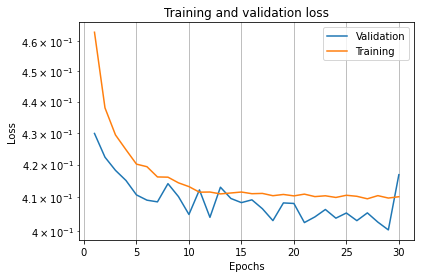

In [445]:
plot_metric(h, 'loss')

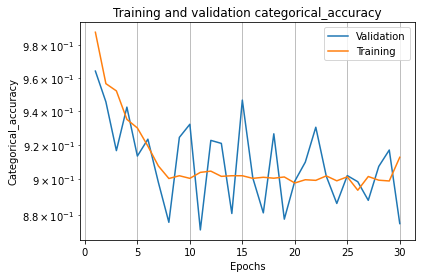

In [446]:
plot_metric(h, 'categorical_accuracy')

In [447]:
a = history.history

a

{'categorical_accuracy': [0.988212525844574,
  0.95645672082901,
  0.9520584344863892,
  0.9349929690361023,
  0.9298909306526184,
  0.919247031211853,
  0.9077234268188477,
  0.9005101919174194,
  0.9020935893058777,
  0.9005981683731079,
  0.9040288329124451,
  0.9047325849533081,
  0.9017417430877686,
  0.9020935893058777,
  0.9020935893058777,
  0.9005981683731079,
  0.9012139439582825,
  0.9006861448287964,
  0.9013898372650146,
  0.8979591727256775,
  0.8998064994812012,
  0.8994545936584473,
  0.9020056128501892,
  0.8991907238960266,
  0.9014778137207031,
  0.8938247561454773,
  0.9016537666320801,
  0.8995425701141357,
  0.8991027474403381,
  0.9127374887466431],
 'loss': [0.46306461095809937,
  0.4379783272743225,
  0.4293283224105835,
  0.42467835545539856,
  0.42019203305244446,
  0.4193928837776184,
  0.4162456691265106,
  0.41617441177368164,
  0.41444411873817444,
  0.41329315304756165,
  0.41159868240356445,
  0.4116451144218445,
  0.4110775291919708,
  0.41135630011558

In [448]:
eval_model=model.evaluate(X_train_norm, y_train_norm)
eval_model

445/445 [==============================] - 1s 1ms/step - loss: 0.4147 - categorical_accuracy: 0.8693


[0.4146597683429718, 0.869317352771759]

In [449]:
model.save('accident_model.h5')

In [450]:
train_loss, train_acc = model.evaluate(X_train_norm, y_train_norm)

445/445 [==============================] - 1s 1ms/step - loss: 0.4147 - categorical_accuracy: 0.8693


In [451]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test_norm)

219/219 [==============================] - 0s 1ms/step - loss: 0.4149 - categorical_accuracy: 0.8771


In [452]:
##accuracy

print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.869, Test accuracy: 0.877


In [453]:
#loss 

print('Train loss: %.3f, Test loss: %.3f' % (train_loss, test_loss))

Train loss: 0.415, Test loss: 0.415


Now we are going to try to increase our model performance by playing with the parameters

In [454]:
h = model.fit(X_train_norm, y_train_norm, epochs=64,  batch_size=40, validation_split=.2, callbacks=[history])

Epoch 1/64
285/285 [==============================] - 1s 3ms/step - loss: 0.4062 - categorical_accuracy: 0.8995 - val_loss: 0.4025 - val_categorical_accuracy: 0.9254
Epoch 2/64
285/285 [==============================] - 1s 2ms/step - loss: 0.4056 - categorical_accuracy: 0.9123 - val_loss: 0.4014 - val_categorical_accuracy: 0.9254
Epoch 3/64
285/285 [==============================] - 1s 2ms/step - loss: 0.4048 - categorical_accuracy: 0.9134 - val_loss: 0.4074 - val_categorical_accuracy: 0.9346
Epoch 4/64
285/285 [==============================] - 1s 2ms/step - loss: 0.4051 - categorical_accuracy: 0.9130 - val_loss: 0.4019 - val_categorical_accuracy: 0.9384
Epoch 5/64
285/285 [==============================] - 1s 2ms/step - loss: 0.4048 - categorical_accuracy: 0.9119 - val_loss: 0.4035 - val_categorical_accuracy: 0.9532
Epoch 6/64
285/285 [==============================] - 1s 2ms/step - loss: 0.4046 - categorical_accuracy: 0.9139 - val_loss: 0.4049 - val_categorical_accuracy: 0.9177
Epoc

In [455]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test_norm, verbose=2)

print('\nTest accuracy:', test_acc) 

219/219 - 0s - loss: 0.4061 - categorical_accuracy: 0.9087

Test accuracy: 0.9087142944335938


In [456]:
neuronal_net_acc = test_acc

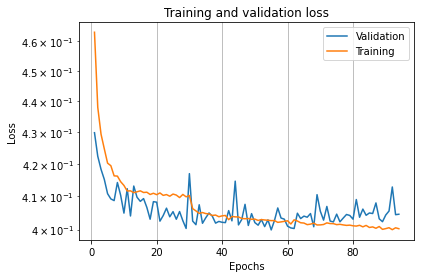

In [457]:
plot_metric(h, 'loss')

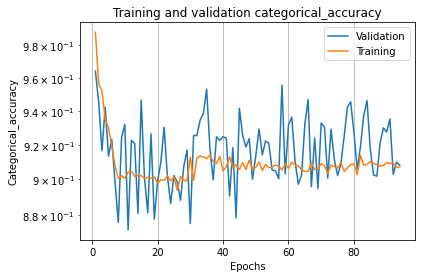

In [458]:
plot_metric(h, 'categorical_accuracy')

##Summary

In [468]:
data = {'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'Soft-votting', 'Hard-votting', 'Bagging Classifier', 'Neuronal Network'],
        'Accuracy': [logistic_r_acc,k_neig_acc,decision_tree_acc,random_forest_acc,xg_boost_acc,svm_acc,soft_votting_acc,hard_votting_acc,bagging_class_acc,neuronal_net_acc,],
        'No':[logistic_r_prec_no,k_neig_prec_no,decision_tree_no,random_forest_no,xg_boost_no,svm_no,soft_vott_no,hard_vott_no,'',''],
        'Yes':[logistic_r_prec_yes,
               k_neig_prec_yes, decision_tree_yes, random_forest_yes, xg_boost_yes, svm_yes, soft_vott_yes, hard_vott_yes, '','']}

In [469]:
accuracy_models = pd.DataFrame(data)

accuracy_models

,Model,Accuracy,No,Yes
0,Logistic Regression,0.684875,0.708802,0.665868
1,K Neighbors,0.717794,0.694162,0.747974
2,Decision Tree,0.751335,0.745524,0.757427
3,Random Forest,0.732206,0.74042,0.724535
4,XGBoost,0.751335,0.745524,0.757427
5,SVM,0.707000,0.703704,0.711316
6,Soft-votting,0.736833,0.746299,0.728067
7,Hard-votting,0.735676,0.74496,0.72707
8,Bagging Classifier,0.734703,,
9,Neuronal Network,0.908714,,
